In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')

C:\Users\anish\AppData\Local\Temp\ipykernel_5384\414554820.py:4: DtypeWarning: Columns (74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset.csv')


In [4]:
# Display the first few rows and summary information
print(df.head())
print(df.info())

   barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  14.167143         0.0        0.0        0.0      19      0.0        0   
1  27.046364         0.0        0.0        0.0       9      0.0        0   
2  11.018889         0.0        0.0        0.0      23      0.0        0   
3  27.046364         0.0        0.0        0.0      10      0.0        0   
4  15.658421         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
3       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
4       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                      createdOn                    modifiedOn  startStop  \
0  T

In [5]:
# Keep only necessary attributes
necessary_columns = ['comb08', 'make', 'model', 'year', 'cylinders', 'displ', 'fuelType', 'co2', 'fuelCost08', 'VClass']
df = df[necessary_columns]

In [6]:
duplicates = df[df.duplicated()]
# Step 3: Display duplicate rows
print("Duplicate Rows:")
print(duplicates)
# Remove duplicate rows
df.drop_duplicates(inplace=True)

Duplicate Rows:
       comb08        make                model  year  cylinders  displ  \
19         19        Audi                  100  1993        6.0    2.8   
25         13       Dodge  B150/B250 Wagon 2WD  1985        8.0    5.2   
28         20       Buick                Regal  1993        6.0    3.1   
36         13       Dodge  B150/B250 Wagon 2WD  1985        8.0    5.2   
38         20   Chevrolet               Lumina  1993        6.0    3.1   
...       ...         ...                  ...   ...        ...    ...   
47984      25       Mazda                  323  1993        4.0    1.6   
47987      11   Chevrolet    G30 Sport Van 2WD  1985        8.0    5.7   
47990      18  Mitsubishi             Diamante  1993        6.0    3.0   
48009      15       Dodge  B150/B250 Wagon 2WD  1985        6.0    3.7   
48029      21      Subaru           Legacy AWD  1993        4.0    2.2   

      fuelType  co2  fuelCost08        VClass  
19     Premium   -1        3350  Midsize Cars  

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values)

# Drop rows with missing values in essential columns
df.dropna(subset=necessary_columns, inplace=True)

Missing values before handling:
 comb08          0
make            0
model           0
year            0
cylinders     965
displ         963
fuelType        0
co2             0
fuelCost08      0
VClass          0
dtype: int64


In [8]:
# Check for null values again
print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 comb08        0
make          0
model         0
year          0
cylinders     0
displ         0
fuelType      0
co2           0
fuelCost08    0
VClass        0
dtype: int64


In [9]:
# Check data types of each column
print(df.dtypes)

# Convert mixed types if needed (for example, ensure 'year' is an integer)
df['year'] = df['year'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)
df['displ'] = df['displ'].astype(float)  # Ensure displacement is float

# Check unique values in categorical columns to identify any issues
print(df['make'].unique())
print(df['fuelType'].unique())
print(df['VClass'].unique())

comb08          int64
make           object
model          object
year            int64
cylinders     float64
displ         float64
fuelType       object
co2             int64
fuelCost08      int64
VClass         object
dtype: object
['Alfa Romeo' 'Ferrari' 'Dodge' 'Subaru' 'Toyota' 'Volkswagen' 'Volvo'
 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'CX Automotive'
 'Nissan' 'Ford' 'Hyundai' 'Infiniti' 'Lexus' 'Mercury' 'Mazda'
 'Oldsmobile' 'Plymouth' 'Pontiac' 'Rolls-Royce' 'Eagle' 'Lincoln'
 'Mercedes-Benz' 'GMC' 'Saab' 'Honda' 'Saturn' 'Mitsubishi' 'Isuzu' 'Jeep'
 'AM General' 'Geo' 'Suzuki' 'E. P. Dutton, Inc.' 'Land Rover' 'PAS, Inc'
 'Acura' 'Jaguar' 'Lotus' 'Grumman Olson' 'Porsche'
 'American Motors Corporation' 'Kia' 'Lamborghini'
 'Panoz Auto-Development' 'Maserati' 'Saleen' 'Aston Martin'
 'Dabryan Coach Builders Inc' 'Federal Coach' 'Vector' 'Bentley' 'Daewoo'
 'Qvale' 'Roush Performance' 'Autokraft Limited' 'Bertone'
 'Panther Car Company Limited' 'Texas Coach Co

In [10]:
# Rename columns if needed for better understanding (optional)
df.rename(columns={'comb08': 'combined_mpg'}, inplace=True)
df.rename(columns={'fuelCost08': 'fuelCost'}, inplace=True)

# Reorder columns if necessary (optional)
df = df[['make', 'model', 'year', 'cylinders', 'displ', 'fuelType', 'co2', 'fuelCost', 'VClass', 'combined_mpg']]

In [11]:
df.to_csv('filtered_dataset.csv', index=False)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, shapiro

# Load the dataset
df = pd.read_csv('filtered_dataset.csv')

In [13]:
# Display the first few rows and summary information
print(df.head())
print(df.info())

         make                model  year  cylinders  displ fuelType  co2  \
0  Alfa Romeo   Spider Veloce 2000  1985          4    2.0  Regular   -1   
1     Ferrari           Testarossa  1985         12    4.9  Regular   -1   
2       Dodge              Charger  1985          4    2.2  Regular   -1   
3       Dodge  B150/B250 Wagon 2WD  1985          8    5.2  Regular   -1   
4      Subaru     Legacy AWD Turbo  1993          4    2.2  Premium   -1   

   fuelCost           VClass  combined_mpg  
0      2400      Two Seaters            21  
1      4600      Two Seaters            11  
2      1900  Subcompact Cars            27  
3      4600             Vans            11  
4      3350     Compact Cars            19  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42027 entries, 0 to 42026
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          42027 non-null  object 
 1   model         42027 non-null  

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
print(df.info())  # 8 columns, 398 observations
print("-"*60)
print(df.isna().sum()) # Horsepower 6 missing values

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42027 entries, 0 to 42026
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          42027 non-null  object 
 1   model         42027 non-null  object 
 2   year          42027 non-null  int64  
 3   cylinders     42027 non-null  int64  
 4   displ         42027 non-null  float64
 5   fuelType      42027 non-null  object 
 6   co2           42027 non-null  int64  
 7   fuelCost      42027 non-null  int64  
 8   VClass        42027 non-null  object 
 9   combined_mpg  42027 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.2+ MB
None
------------------------------------------------------------
make            0
model           0
year            0
cylinders       0
displ           0
fuelType        0
co2             0
fuelCost        0
VClass          0
combined_mpg    0
dtype: int64


,year,cylinders,displ,co2,fuelCost,combined_mpg
count,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000,42027.000000
mean,2005.331358,5.706355,3.270612,144.380470,2838.350346,20.809123
std,12.341534,1.793955,1.362745,204.769305,807.628841,5.646259
min,1984.000000,2.000000,0.600000,-1.000000,850.000000,7.000000
25%,1994.000000,4.000000,2.000000,-1.000000,2300.000000,17.000000
50%,2007.000000,6.000000,3.000000,-1.000000,2750.000000,20.000000
75%,2016.000000,6.000000,4.200000,348.000000,3350.000000,24.000000
max,2025.000000,16.000000,8.400000,979.000000,9100.000000,59.000000


In [16]:
# Replace negative CO2 values with NaN
df['co2'] = df['co2'].where(df['co2'] >= 0, np.nan)

# Check the result
print("Number of NaN values in 'co2':", df['co2'].isna().sum())
print(df['co2'].head())  # Display the first few rows of the 'co2' column

Number of NaN values in 'co2': 26993
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: co2, dtype: float64


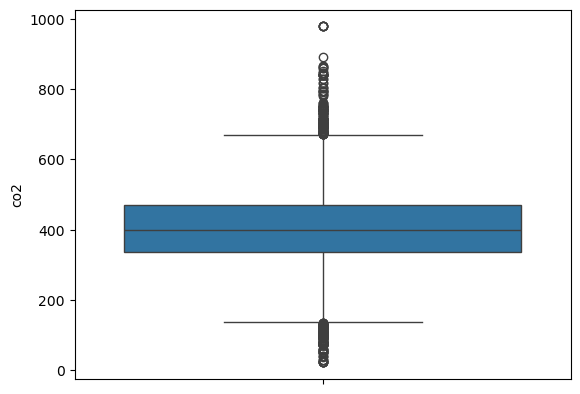

In [17]:
sns.boxplot(df['co2'])
plt.show()

In [18]:
# Using pandas
df['co2'] = df['co2'].fillna(df['co2'].median())

# Or using scikit-learn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['co2'] = imputer.fit_transform(df[['co2']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42027 entries, 0 to 42026
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          42027 non-null  object 
 1   model         42027 non-null  object 
 2   year          42027 non-null  int64  
 3   cylinders     42027 non-null  int64  
 4   displ         42027 non-null  float64
 5   fuelType      42027 non-null  object 
 6   co2           42027 non-null  float64
 7   fuelCost      42027 non-null  int64  
 8   VClass        42027 non-null  object 
 9   combined_mpg  42027 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 3.2+ MB


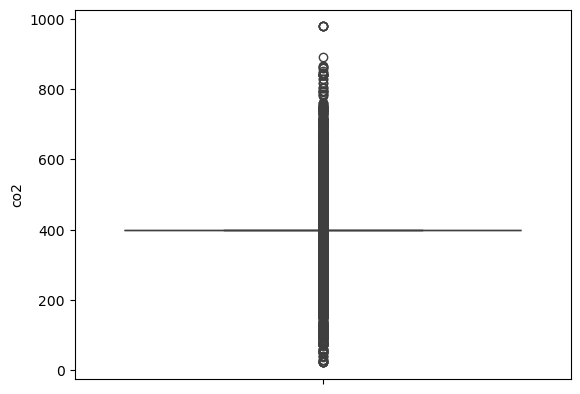

In [19]:
sns.boxplot(df['co2'])
plt.show()

In [20]:
df.head()

,make,model,year,cylinders,displ,fuelType,co2,fuelCost,VClass,combined_mpg
0,Alfa Romeo,Spider Veloce 2000,1985,4,2.0,Regular,399.0,2400,Two Seaters,21
1,Ferrari,Testarossa,1985,12,4.9,Regular,399.0,4600,Two Seaters,11
2,Dodge,Charger,1985,4,2.2,Regular,399.0,1900,Subcompact Cars,27
3,Dodge,B150/B250 Wagon 2WD,1985,8,5.2,Regular,399.0,4600,Vans,11
4,Subaru,Legacy AWD Turbo,1993,4,2.2,Premium,399.0,3350,Compact Cars,19


In [21]:
# 1. Using IQR method to identify outliers
Q1 = df['co2'].quantile(0.25)
Q3 = df['co2'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['co2'] < lower_bound) | (df['co2'] > upper_bound)]

# 2. Options for handling outliers:
# # a) Capping (Winsorization)
# df['CO2_capped'] = df['co2'].clip(lower=lower_bound, upper=upper_bound)

# # b) Remove outliers (if you're sure they're errors)
# df_clean = df[(df['co2'] >= lower_bound) & (df['co2'] <= upper_bound)]

# c) Log transformation (to handle skewness)
import numpy as np
df['CO2_log'] = np.log1p(df['co2'])  # log1p handles zero values

In [22]:
df.to_csv('cleaned_co2_data.csv', index=False)

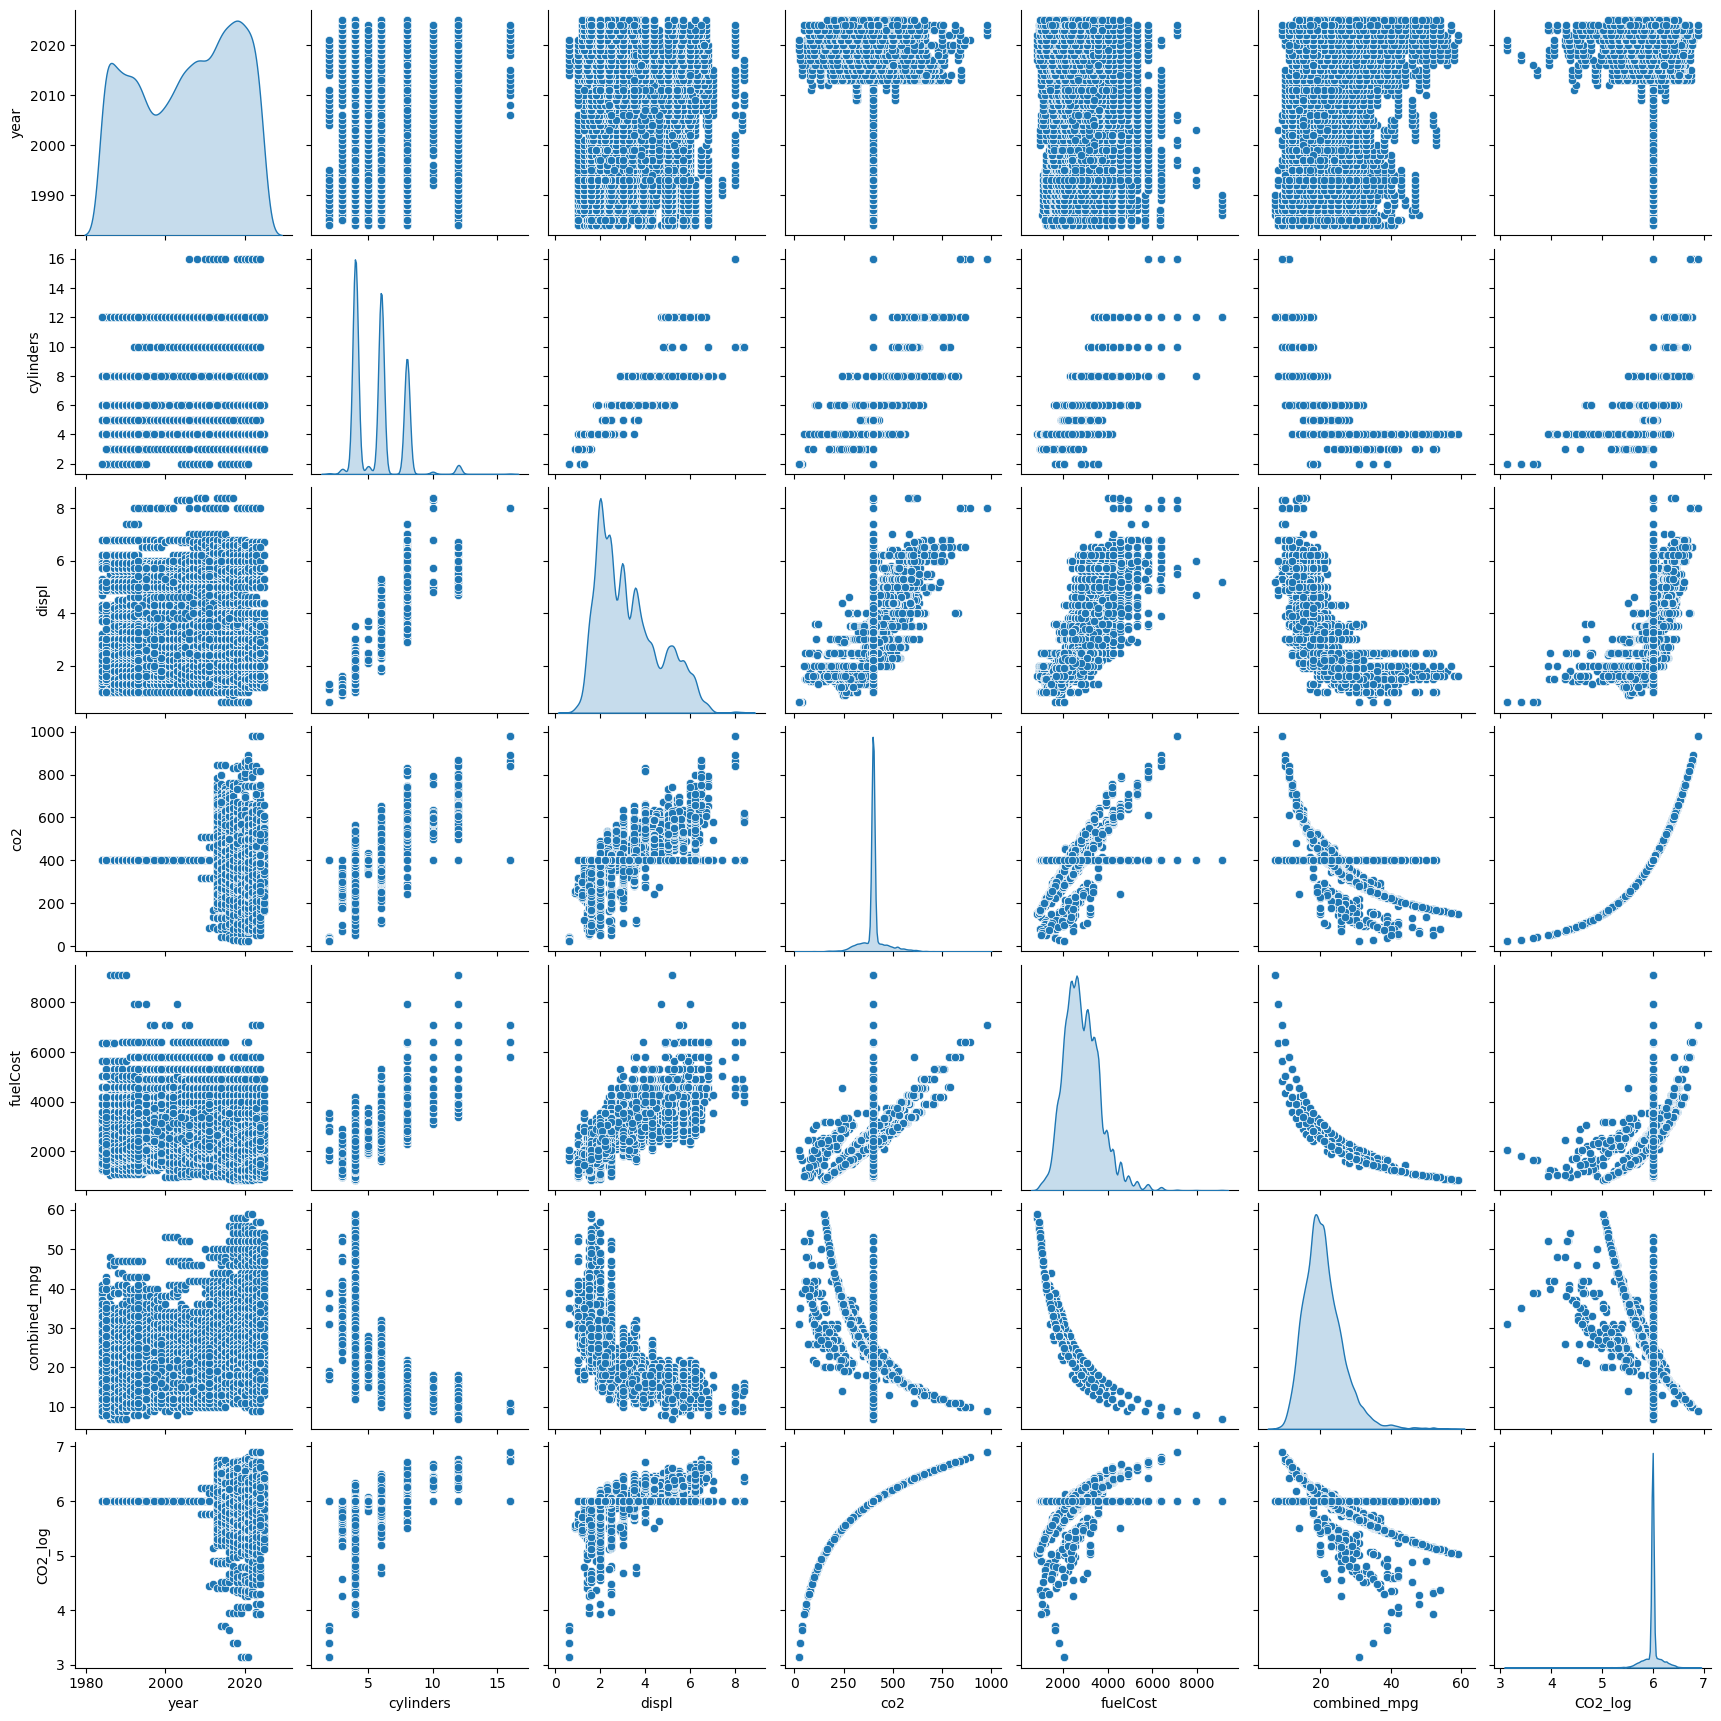

In [23]:
#Coorelation 
sns.pairplot(df,diag_kind='kde')
plt.show()

In [24]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()

# If you want to view correlations with 'combined_mpg' specifically
corr_matrix['combined_mpg'].sort_values(ascending=False)

combined_mpg    1.000000
year            0.257697
co2            -0.575636
CO2_log        -0.602183
cylinders      -0.681855
displ          -0.723957
fuelCost       -0.849273
Name: combined_mpg, dtype: float64

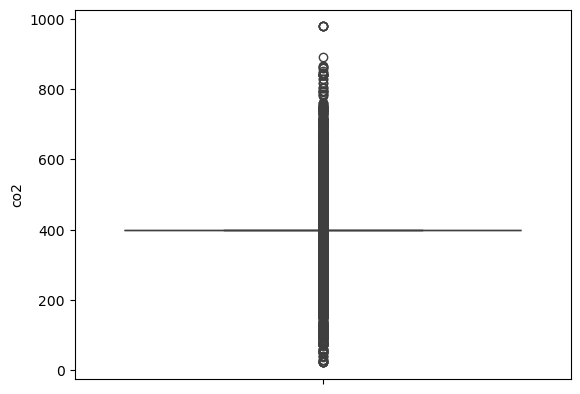

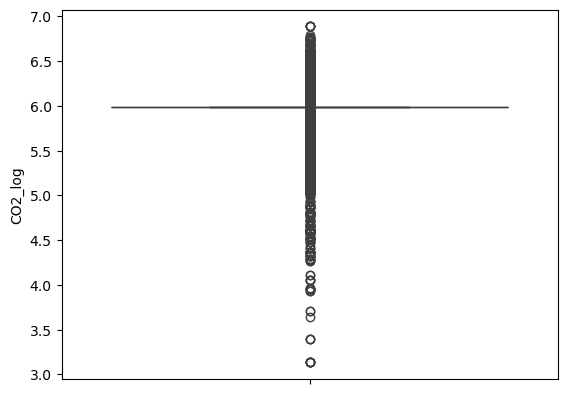

In [25]:
sns.boxplot(df['co2'])
plt.show()

sns.boxplot(df['CO2_log'])
plt.show()


In [26]:
# Frequency distribution of each categorical variable
print("Frequency distribution of 'make':")
print(df['make'].value_counts().head(10))  # Top 10 most common car makes

print("\nFrequency distribution of 'model':")
print(df['model'].value_counts().head(10))  # Top 10 most common car models

print("\nFrequency distribution of 'fuelType':")
print(df['fuelType'].value_counts())  # Frequency distribution of fuel types

print("\nFrequency distribution of 'VClass':")
print(df['VClass'].value_counts())  # Frequency distribution of vehicle classes


Frequency distribution of 'make':
make
Chevrolet        3781
Ford             3307
GMC              2377
Dodge            2295
BMW              2198
Toyota           2159
Mercedes-Benz    1855
Nissan           1422
Porsche          1296
Audi             1175
Name: count, dtype: int64

Frequency distribution of 'model':
model
Mustang              181
Jetta                179
F150 Pickup 2WD      176
Camaro               176
F150 Pickup 4WD      166
Accord               148
Ranger Pickup 2WD    144
Corolla              138
Truck 2WD            134
Civic                128
Name: count, dtype: int64

Frequency distribution of 'fuelType':
fuelType
Regular                        25177
Premium                        13652
Gasoline or E85                 1366
Diesel                          1109
Premium and Electricity          177
Midgrade                         166
Premium or E85                   127
Regular Gas and Electricity      106
CNG                               60
Premium Gas or E

In [27]:
# Average combined_mpg by fuelType
print("\nAverage combined_mpg by fuelType:")
print(df.groupby('fuelType')['combined_mpg'].mean())

# Average combined_mpg by VClass
print("\nAverage combined_mpg by VClass:")
print(df.groupby('VClass')['combined_mpg'].mean())



Average combined_mpg by fuelType:
fuelType
CNG                            18.133333
Diesel                         24.325518
Gasoline or E85                17.747438
Gasoline or natural gas        15.350000
Gasoline or propane            13.500000
Midgrade                       17.704819
Premium                        20.044169
Premium Gas or Electricity     26.381818
Premium and Electricity        24.858757
Premium or E85                 20.125984
Regular                        21.156571
Regular Gas and Electricity    37.792453
Regular Gas or Electricity     42.000000
Name: combined_mpg, dtype: float64

Average combined_mpg by VClass:
VClass
Compact Cars                          24.061268
Large Cars                            20.271872
Midsize Cars                          23.057741
Midsize Station Wagons                21.091633
Midsize-Large Station Wagons          19.789091
Minicompact Cars                      21.261484
Minivan - 2WD                         19.841558
Minivan - 4W

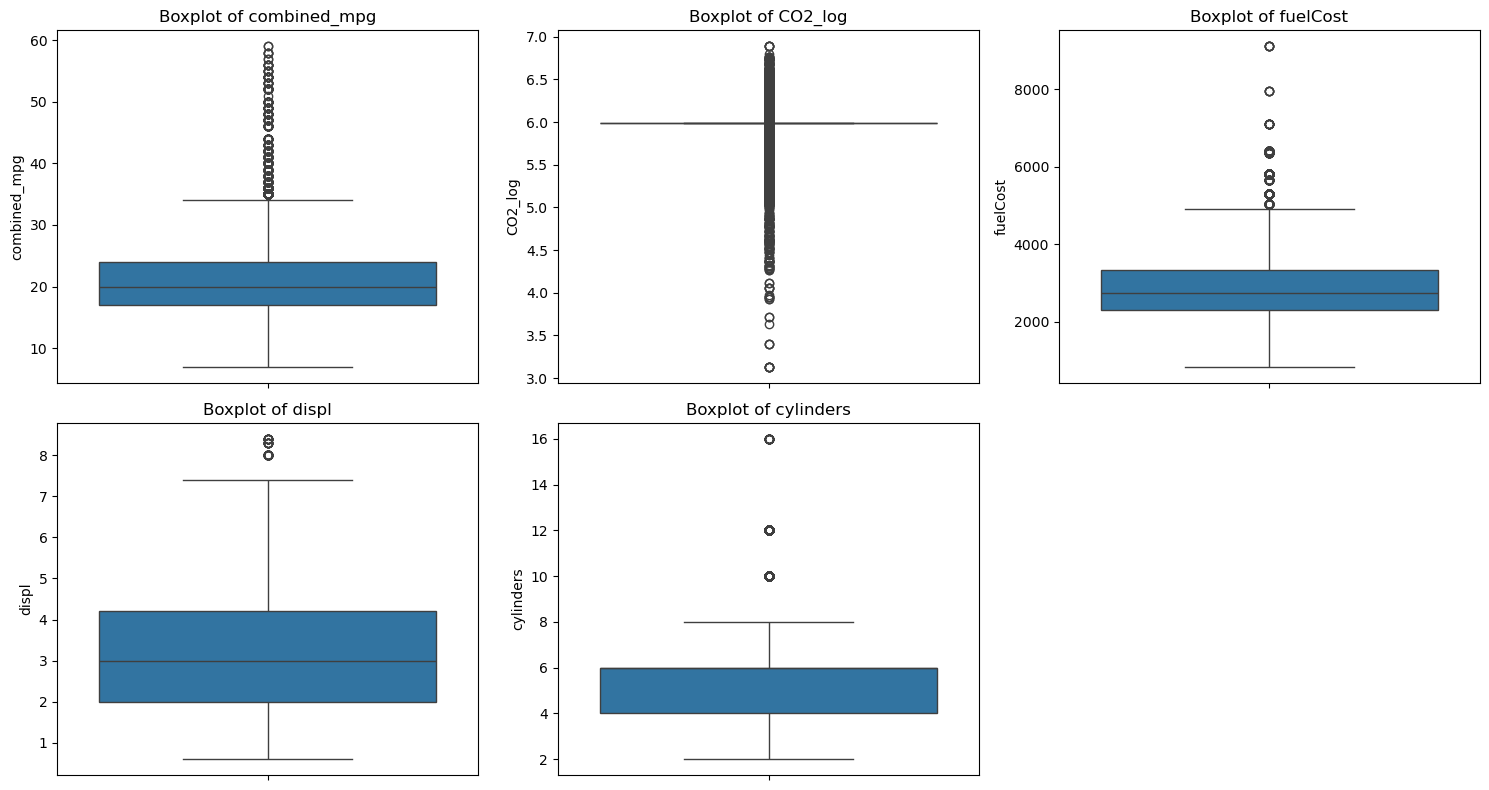

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns to check for outliers
numeric_columns = ['combined_mpg', 'CO2_log', 'fuelCost', 'displ', 'cylinders']

# Create boxplots for each numeric column
plt.figure(figsize=(15, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Adjust subplot grid if necessary
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [29]:
import numpy as np

# Log transformation for skewed variables
df['fuelCost'] = np.log1p(df['fuelCost'])  # Adding 1 to handle zero values, if any
df['displ'] = np.log1p(df['displ'])
df['cylinders'] = np.log1p(df['cylinders'])

# Removing outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example: Remove outliers in 'combined_mpg' and 'fuelCost'
df = remove_outliers(df, 'combined_mpg')
df = remove_outliers(df, 'fuelCost')
df = remove_outliers(df, 'displ')
df = remove_outliers(df, 'cylinders')


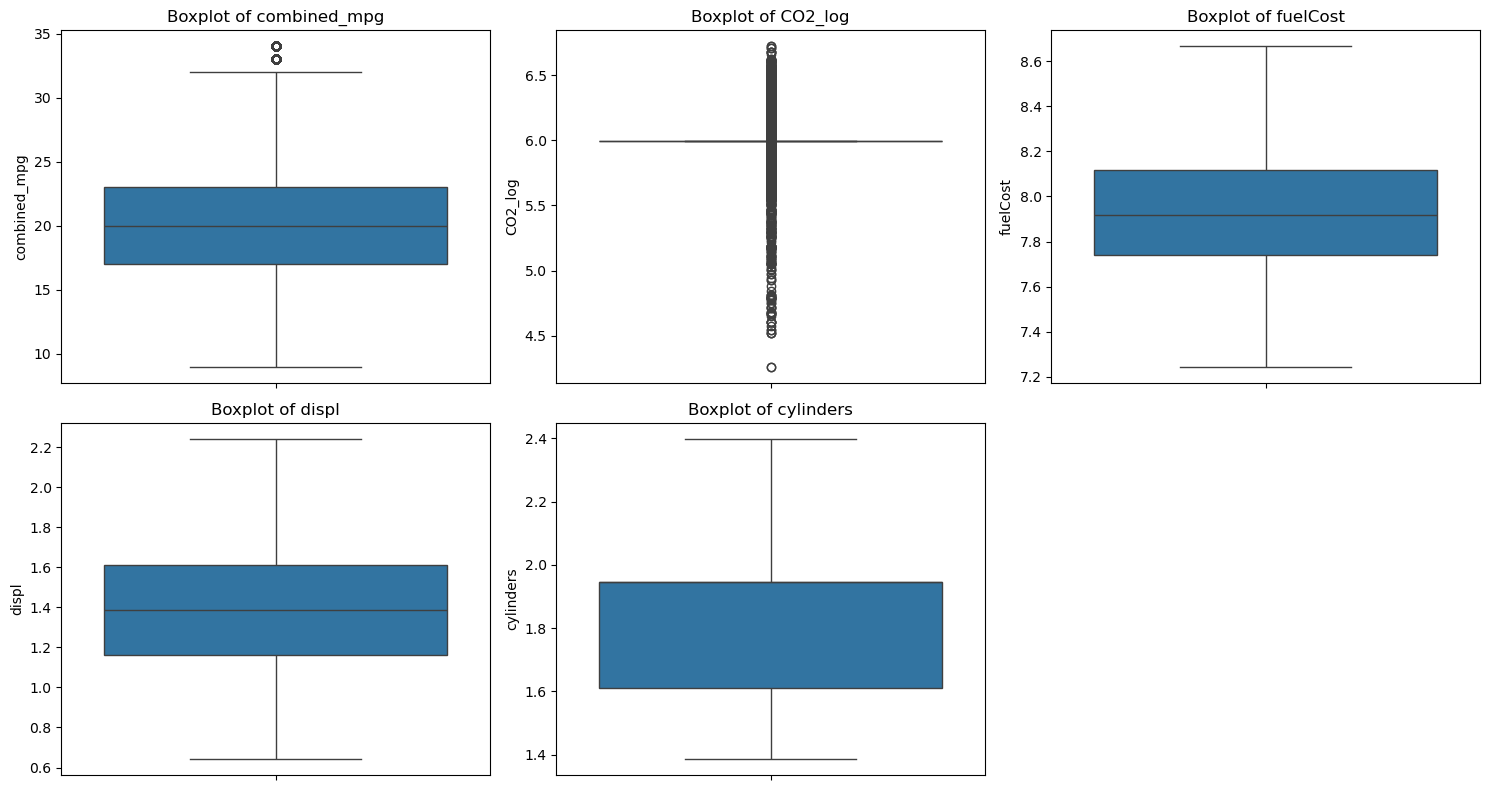

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns to check for outliers
numeric_columns = ['combined_mpg', 'CO2_log', 'fuelCost', 'displ', 'cylinders']

# Create boxplots for each numeric column
plt.figure(figsize=(15, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Adjust subplot grid if necessary
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

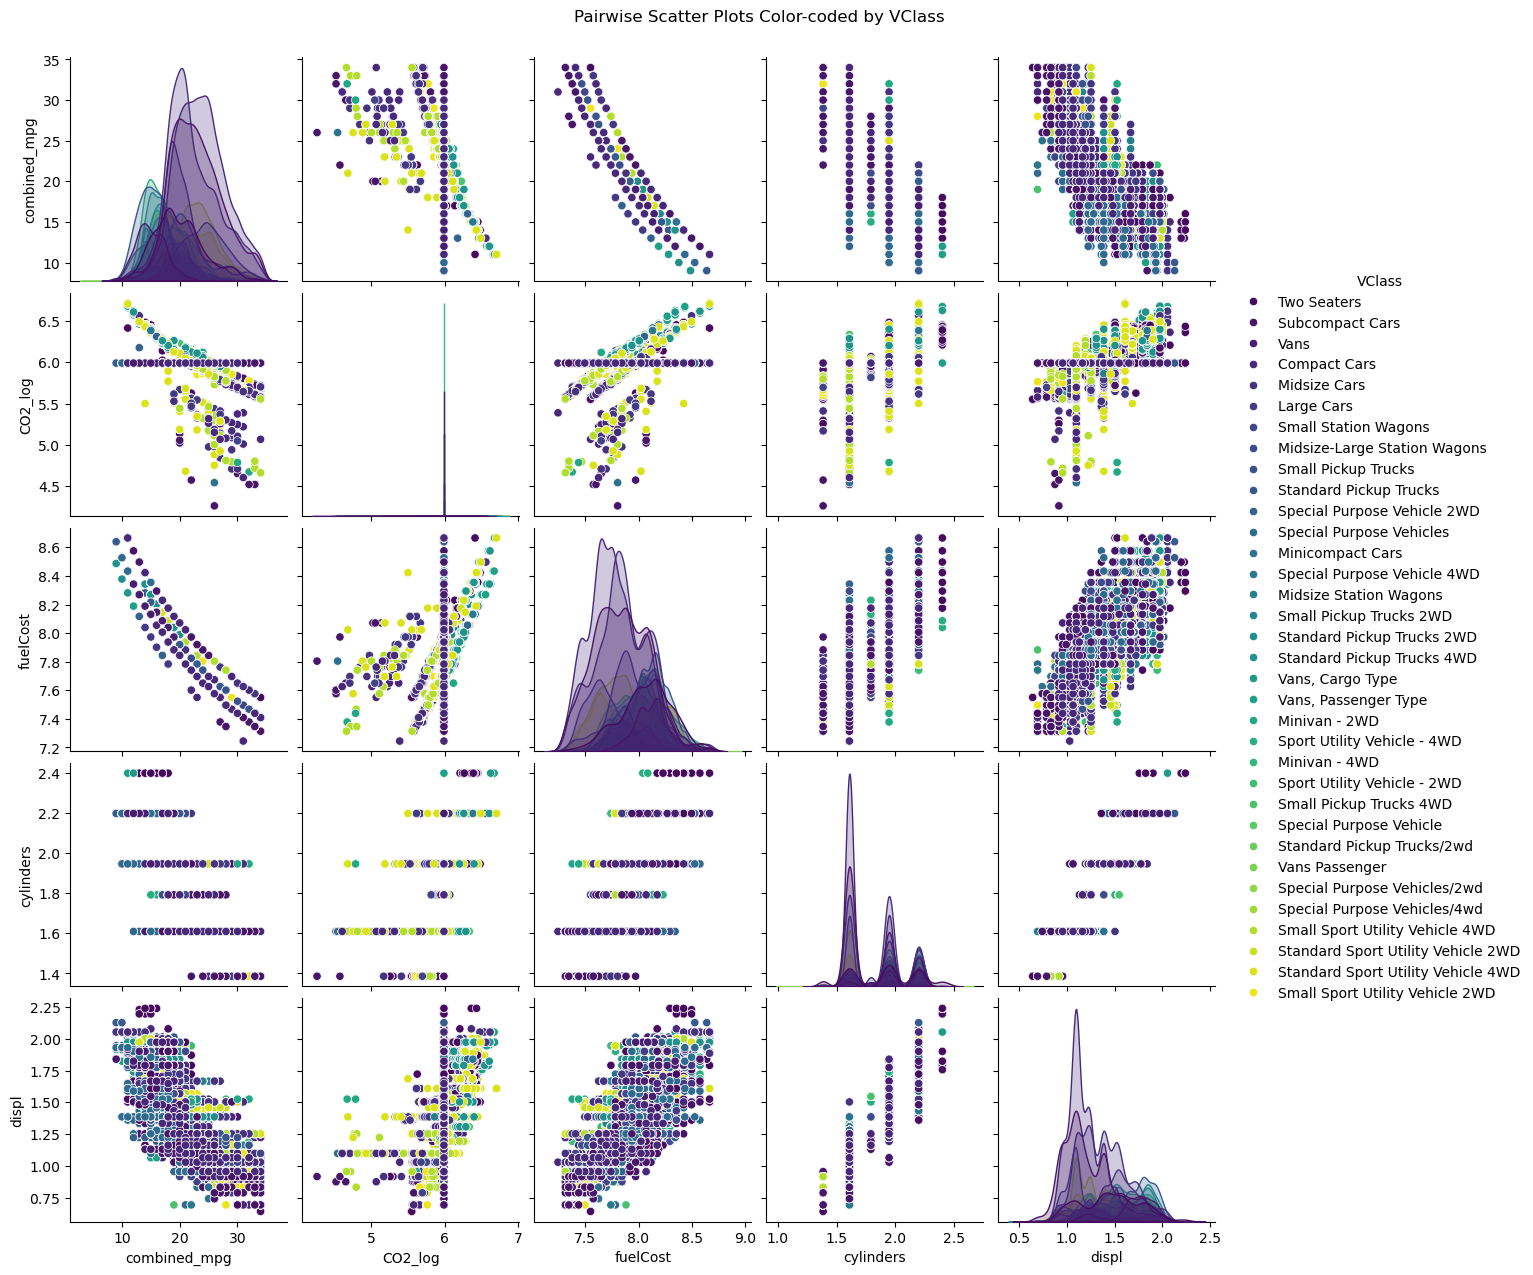

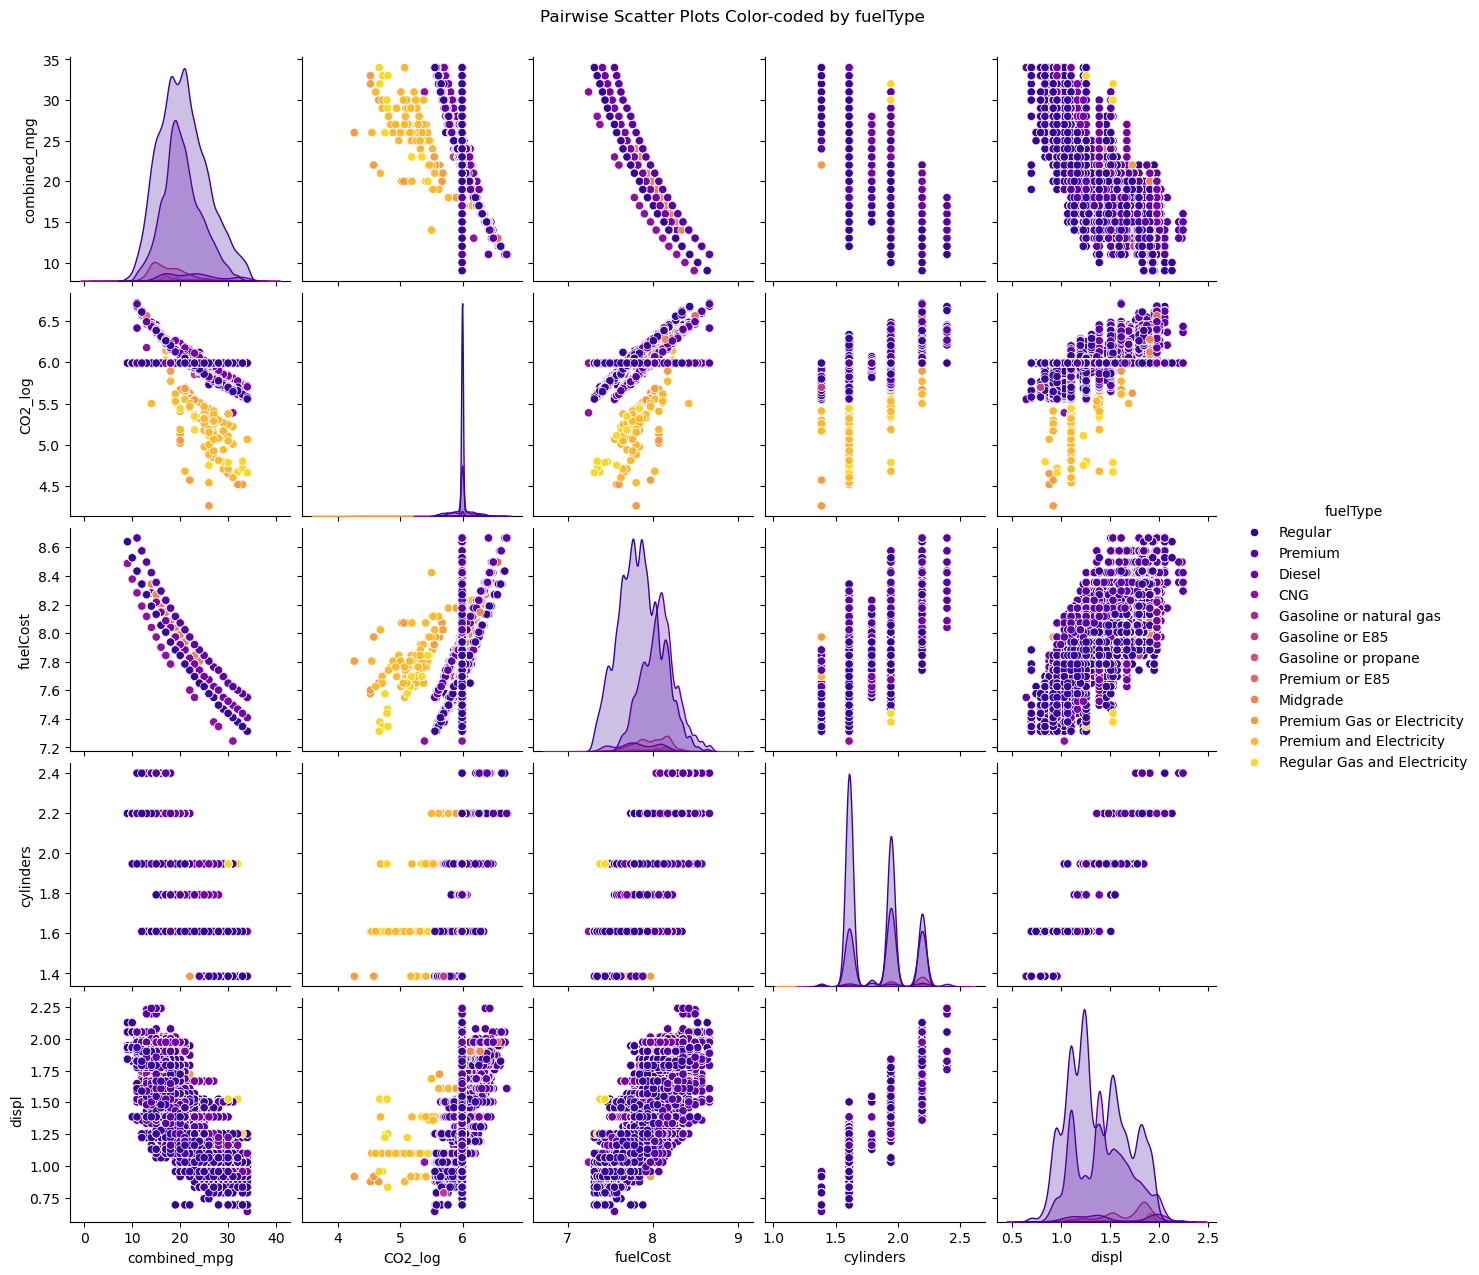

In [31]:
# Pairwise scatter plots with color encoding by 'VClass'
sns.pairplot(df, hue='VClass', vars=['combined_mpg', 'CO2_log', 'fuelCost', 'cylinders', 'displ'], palette='viridis')
plt.suptitle("Pairwise Scatter Plots Color-coded by VClass", y=1.02)
plt.show()

# Pairwise scatter plots with color encoding by 'fuelType'
sns.pairplot(df, hue='fuelType', vars=['combined_mpg', 'CO2_log', 'fuelCost', 'cylinders', 'displ'], palette='plasma')
plt.suptitle("Pairwise Scatter Plots Color-coded by fuelType", y=1.02)
plt.show()


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation for numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                  year  cylinders     displ       co2  fuelCost  combined_mpg  \
year          1.000000   0.030650  0.006640  0.065444 -0.104596      0.266187   
cylinders     0.030650   1.000000  0.923176  0.461319  0.754660     -0.741354   
displ         0.006640   0.923176  1.000000  0.458639  0.757588     -0.788053   
co2           0.065444   0.461319  0.458639  1.000000  0.477691     -0.517357   
fuelCost     -0.104596   0.754660  0.757588  0.477691  1.000000     -0.902912   
combined_mpg  0.266187  -0.741354 -0.788053 -0.517357 -0.902912      1.000000   
CO2_log      -0.008831   0.447721  0.446745  0.974779  0.476215     -0.535959   

               CO2_log  
year         -0.008831  
cylinders     0.447721  
displ         0.446745  
co2           0.974779  
fuelCost      0.476215  
combined_mpg -0.535959  
CO2_log       1.000000  


In [34]:
# Correlation of combined_mpg with other numeric features
correlation_with_target = numeric_df.corr()['combined_mpg']
print(correlation_with_target)


year            0.266187
cylinders      -0.741354
displ          -0.788053
co2            -0.517357
fuelCost       -0.902912
combined_mpg    1.000000
CO2_log        -0.535959
Name: combined_mpg, dtype: float64


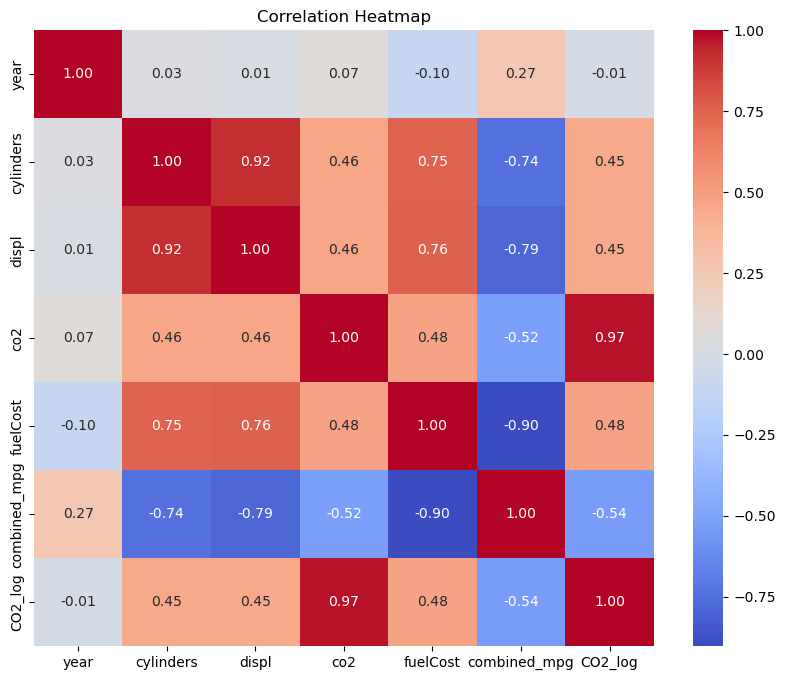

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


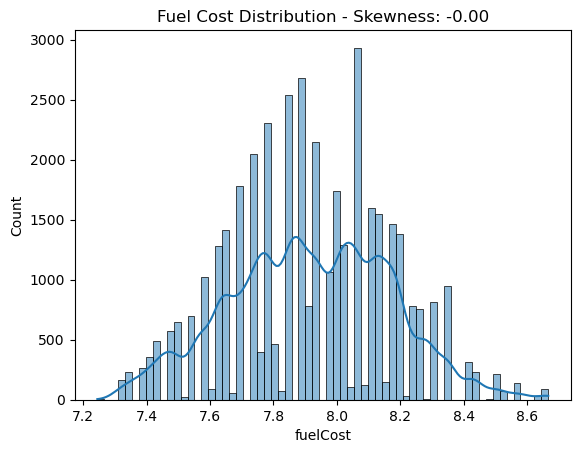

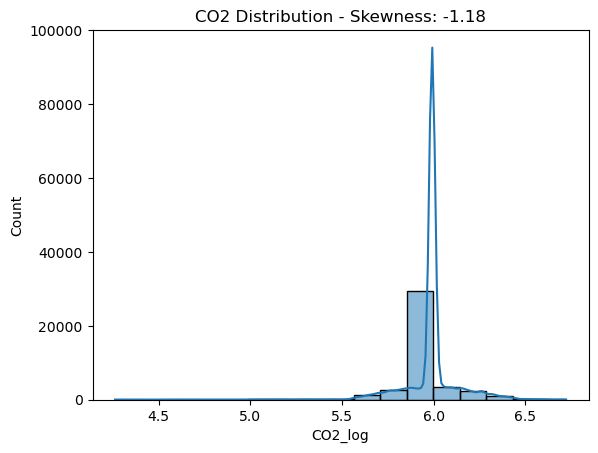

Skewness of fuelCost: -0.00
Skewness of CO2_log: -1.18


In [36]:
# Calculate skewness for fuelCost and CO2
fuelCost_skew = df['fuelCost'].skew()
CO2_log_skew = df['CO2_log'].skew()

# Plot histograms for visual inspection
sns.histplot(df['fuelCost'], kde=True)
plt.title(f'Fuel Cost Distribution - Skewness: {fuelCost_skew:.2f}')
plt.show()

sns.histplot(df['CO2_log'], kde=True)
plt.title(f'CO2 Distribution - Skewness: {CO2_log_skew:.2f}')
plt.show()

# Print skewness values
print(f"Skewness of fuelCost: {fuelCost_skew:.2f}")
print(f"Skewness of CO2_log: {CO2_log_skew:.2f}")


In [37]:
# from scipy import stats
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Ensure CO2 contains only positive values (if not, transformation will fail)
# if (df['CO2_log'] > 0).all():
#     # Apply Box-Cox Transformation to CO2
#     df['CO2_boxcox'], fitted_lambda = stats.boxcox(df['CO2_log'])
    
#     # Plot the original and transformed CO2 distributions
#     plt.figure(figsize=(12, 6))

#     # Original CO2 Distribution
#     plt.subplot(1, 2, 1)
#     sns.histplot(df['CO2_log'], kde=True)
#     plt.title('Original CO2 Distribution')

#     # Transformed CO2 Distribution
#     plt.subplot(1, 2, 2)
#     sns.histplot(df['CO2_boxcox'], kde=True)
#     plt.title(f'Transformed CO2 Distribution (Box-Cox)\nLambda = {fitted_lambda:.2f}')

#     plt.show()
    
#     # Check the skewness after transformation
#     print(f"Skewness of CO2 (transformed): {df['CO2_boxcox'].skew():.2f}")
# else:
#     print("CO2 contains non-positive values, Box-Cox transformation cannot be applied.")


In [38]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Scatter plots for visual inspection of relationships with combined_mpg
# plt.figure(figsize=(14, 6))

# # CO2_boxcox vs combined_mpg
# plt.subplot(1, 2, 1)
# sns.scatterplot(x=df['CO2_boxcox'], y=df['combined_mpg'])
# plt.title('CO2_boxcox vs. Combined MPG')

# # fuelCost_log vs combined_mpg
# plt.subplot(1, 2, 2)
# sns.scatterplot(x=df['fuelCost_log'], y=df['combined_mpg'])
# plt.title('Fuel Cost Log vs. Combined MPG')

# plt.tight_layout()
# plt.show()

# # Correlation Heatmap to see relationship with combined_mpg
# correlation_matrix = df[['CO2_boxcox', 'fuelCost_log', 'combined_mpg']].corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
# plt.title('Correlation Matrix')
# plt.show()

# # Print individual correlations with the target
# print(f"Correlation of CO2_boxcox with combined_mpg: {correlation_matrix.loc['CO2_boxcox', 'combined_mpg']:.2f}")
# print(f"Correlation of fuelCost_log with combined_mpg: {correlation_matrix.loc['fuelCost_log', 'combined_mpg']:.2f}")


In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame and includes 'CO2_log' and 'fuelCost_log'
# Prepare the data for VIF calculation
X = df[['CO2_log', 'fuelCost']]  # Include only the variables of interest

# Add a constant to the data (required for VIF calculation)
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)



    Feature          VIF
0     const  2049.665366
1   CO2_log     1.293294
2  fuelCost     1.293294


In [40]:
# Drop the 'model' column from the dataframe
df = df.drop(columns=['model','co2'])

# Verify the column is dropped
print(df.columns)


Index(['make', 'year', 'cylinders', 'displ', 'fuelType', 'fuelCost', 'VClass',
       'combined_mpg', 'CO2_log'],
      dtype='object')


In [41]:
from scipy.stats import chi2_contingency

# Example: Perform Chi-square test between 'maker' (categorical) and 'combined_mpg' (continuous)
# You can bin the target into categories (e.g., high/low fuel efficiency) for this.
# Create a contingency table
contingency_table = pd.crosstab(df['make'], pd.cut(df['combined_mpg'], bins=[0, 20, 40, 60, 80, 100]))

# Perform Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square p-value:", p_val)


Chi-square p-value: 0.0


In [42]:
from scipy.stats import chi2_contingency

# Example: Perform Chi-square test between 'maker' (categorical) and 'combined_mpg' (continuous)
# You can bin the target into categories (e.g., high/low fuel efficiency) for this.
# Create a contingency table
contingency_table = pd.crosstab(df['VClass'], pd.cut(df['combined_mpg'], bins=[0, 20, 40, 60, 80, 100]))

# Perform Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square p-value:", p_val)


Chi-square p-value: 0.0


In [43]:
pip install category-encoders


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


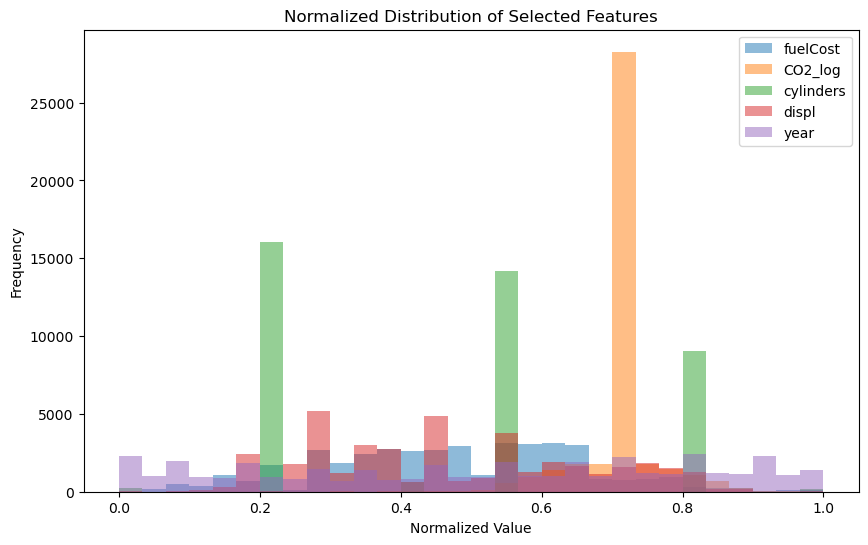

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a pandas DataFrame named 'df' with your data

# Define the numerical features you want to normalize
numerical_features = ['fuelCost', 'CO2_log', 'cylinders', 'displ', 'year']  # adjust based on your dataset

# Initialize the MinMaxScaler to normalize the features
scaler = MinMaxScaler()

# Apply the scaler to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Plot the distribution of the normalized features
plt.figure(figsize=(10, 6))

for feature in numerical_features:
    plt.hist(df[feature], bins=30, alpha=0.5, label=feature)

# Adding labels and title
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')
plt.title('Normalized Distribution of Selected Features')
plt.legend()
plt.show()


In [43]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [45]:
# print(X)

In [46]:
# # Initialize and train the Linear Regression model
# linear_reg = LinearRegression()
# linear_reg.fit(X_train_scaled, y_train)

# # Make predictions
# y_pred_linear = linear_reg.predict(X_test_scaled)
# r2_lr=r2_score(y_test, y_pred_linear)

# # Evaluate the Linear Regression model
# print("Linear Regression:")
# print(f"MAE: {mean_absolute_error(y_test, y_pred_linear)}")
# print(f"MSE: {mean_squared_error(y_test, y_pred_linear)}")
# print(f"R2 Score: {r2_lr}\n")

In [47]:
# from sklearn.model_selection import validation_curve
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor

# # Assuming X_train, y_train are your training data
# param_range = range(5, 35, 5)

# train_scores, val_scores = validation_curve(
#     RandomForestRegressor(),  # Change to your model
#     X_train, y_train,
#     param_name="max_depth",
#     param_range=param_range,
#     cv=5,  # 5-fold cross-validation
#     scoring="neg_mean_squared_error"  # Use MSE for regression
# )

# # Convert negative MSE to positive RMSE
# train_rmse = np.sqrt(-train_scores.mean(axis=1))
# val_rmse = np.sqrt(-val_scores.mean(axis=1))

# # Plot the validation curve
# plt.figure(figsize=(10, 6))
# plt.plot(param_range, train_rmse, label="Training RMSE", color="blue", marker="o")
# plt.plot(param_range, val_rmse, label="Validation RMSE", color="green", marker="o")

# plt.title("Validation Curve for Random Forest Regressor")
# plt.xlabel("Max Depth")
# plt.ylabel("Root Mean Squared Error (RMSE)")
# plt.legend(loc="best")
# plt.grid()
# plt.show()


In [138]:
import pandas as pd
feature_importances = rf.feature_importances_
feature_names = X.columns  # If you have a DataFrame
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
print(feature_df)


                            Feature  Importance
4                          fuelCost    0.874347
6                           CO2_log    0.066309
3                          fuelType    0.050919
2                             displ    0.004876
77                        make_MINI    0.002962
..                              ...         ...
49   make_Grumman Allied Industries    0.000000
48                    make_Goldacre    0.000000
47                         make_Geo    0.000000
46                     make_Genesis    0.000000
136                      make_smart    0.000000

[137 rows x 2 columns]


In [109]:
# # Consolidate by grouping all features except 'fuelCost', taking the mean of 'fuelCost'
# columns_except_fuelCost_log = [col for col in df.columns if col != 'fuelCost_log']
# df_consolidated = df.groupby(columns_except_fuelCost, as_index=False)['fuelCost_log'].mean()

# # Update features and target variable
# X = df_consolidated.drop('combined_mpg', axis=1)  # Adjust if your target variable name is different
# y = df_consolidated['combined_mpg']

# # Split, re-train, and evaluate as shown in the previous code block.

In [48]:
# from sklearn.neighbors import KNeighborsRegressor

# # Initialize KNN Regressor with a chosen value of k (e.g., k=5)
# knn_regressor = KNeighborsRegressor(n_neighbors=5)

# # Fit the model
# knn_regressor.fit(X_train_scaled, y_train)

# # Make predictions
# y_pred_knn = knn_regressor.predict(X_test_scaled)

# # Evaluate
# mae_knn = mean_absolute_error(y_test, y_pred_knn)
# mse_knn = mean_squared_error(y_test, y_pred_knn)
# r2_knn = r2_score(y_test, y_pred_knn)

# print(f"KNN Regressor:\nMAE: {mae_knn}\nMSE: {mse_knn}\nR2 Score: {r2_knn}")


In [48]:
  df.to_csv('final.csv', index=False)

In [46]:
# from sklearn.model_selection import train_test_split

# # Assuming `df` is your complete DataFrame
# X = df.drop('combined_mpg', axis=1)  # Replace 'target' with the name of your target column
# y = df['combined_mpg']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression:
Mean Squared Error: 0.3592
R² Score: 0.9838
------------------------------
KNN Regressor:
Mean Squared Error: 0.4942
R² Score: 0.9777
------------------------------
Random Forest:
Mean Squared Error: 0.0091
R² Score: 0.9996
------------------------------


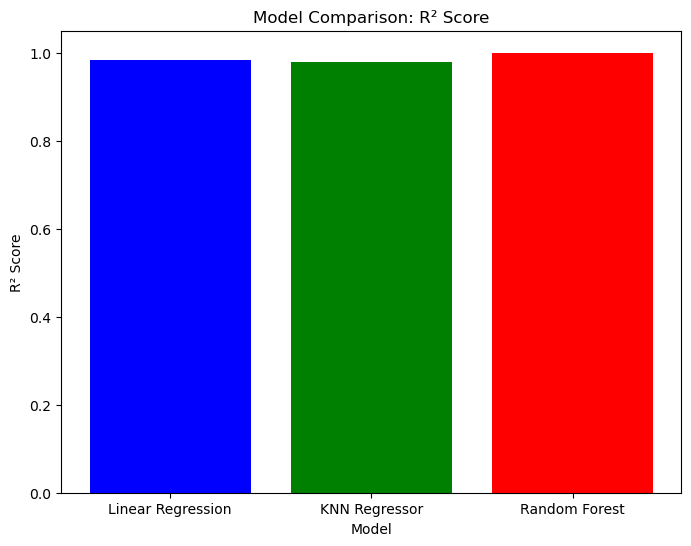

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

# Define the features
numerical_features = ['fuelCost', 'CO2_log','cylinders', 'displ', 'year']
categorical_features = ['fuelType', 'VClass', 'make']

# Preprocessing step: scaling numerical features and encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the models to be compared
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(n_estimators=100)
}

# Prepare the train and test data (assuming you already have X and y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Create a pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Save the model pipeline to a .joblib file
    joblib.dump(pipeline, f'{name.replace(" ", "_").lower()}_pipeline.joblib')

    # Predict on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate the metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[name] = {
        'Mean Squared Error': mse,
        'R² Score': r2
    }

    # Print the results for the current model
    print(f'{name}:')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R² Score: {r2:.4f}')
    print('-' * 30)

# Plot the comparison of models based on R² Score
model_names = list(results.keys())
r2_scores = [results[name]['R² Score'] for name in model_names]

plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Model Comparison: R² Score')
plt.show()


R² Score: 0.9998
RMSE: 0.0628
MAE: 0.0039


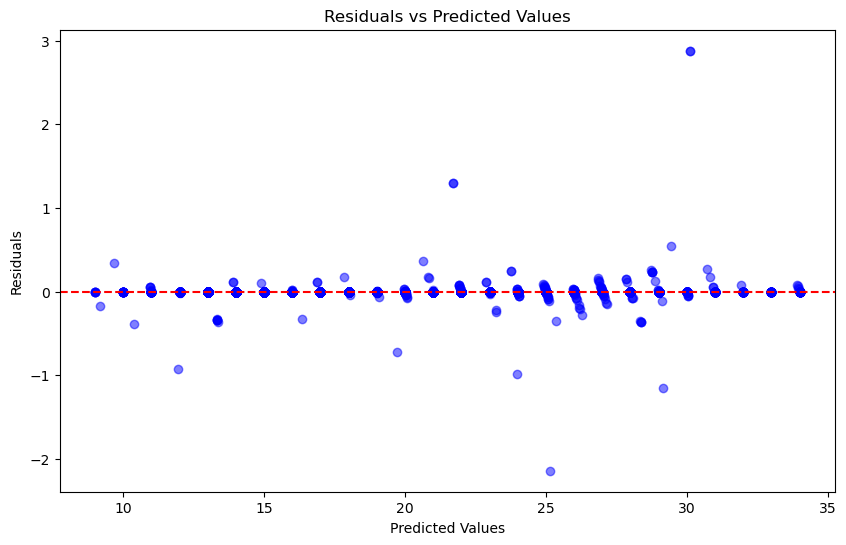

                           Feature  Importance
0                         fuelCost    0.885416
11                fuelType_Premium    0.054574
1                          CO2_log    0.046221
3                            displ    0.005675
15                fuelType_Regular    0.002884
..                             ...         ...
89             make_General Motors    0.000000
86                     make_Fisker    0.000000
83              make_Federal Coach    0.000000
82            make_Excalibur Autos    0.000000
27  VClass_Small Pickup Trucks 4WD    0.000000

[175 rows x 2 columns]


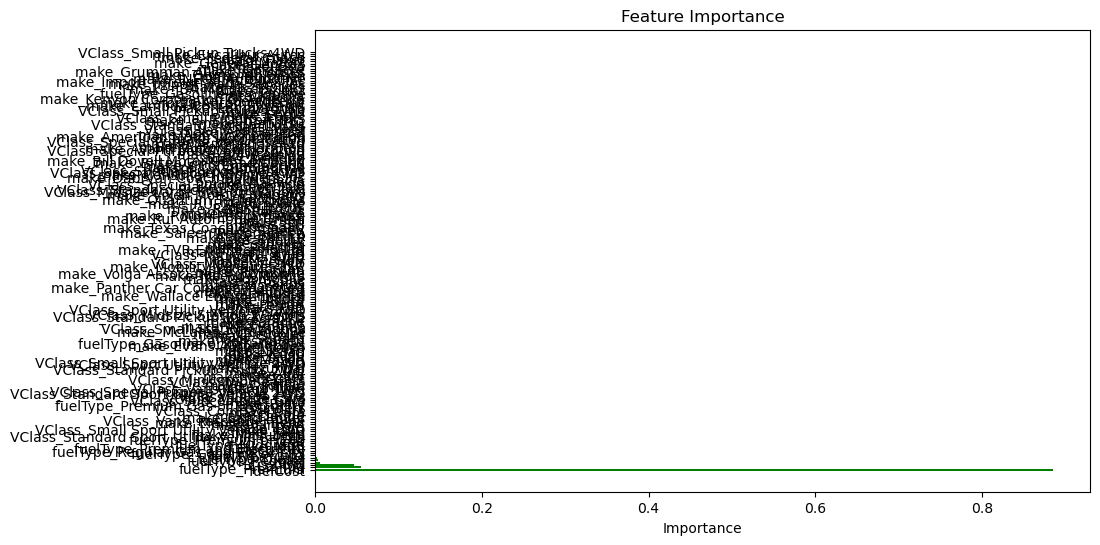

Cross-validated MSE: 0.0104
Cross-validated RMSE: 0.1020
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters from GridSearch: {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best Score from GridSearch: 0.0099


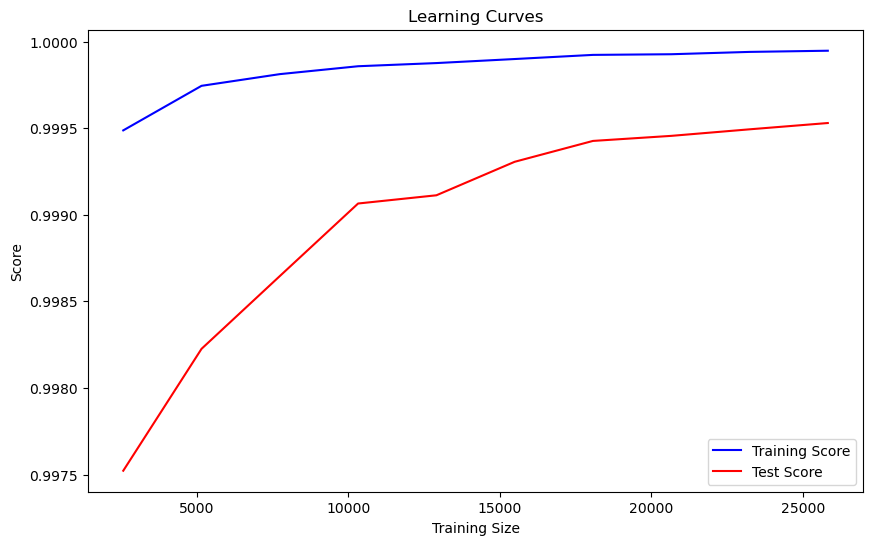

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.model_selection import GridSearchCV
import joblib

# Define the numerical and categorical features
numerical_features = ['fuelCost', 'CO2_log', 'cylinders', 'displ', 'year']
categorical_features = ['fuelType', 'VClass', 'make']

# Load the trained pipeline (make sure it includes preprocessor and model)
pipeline = joblib.load('random_forest_pipeline.joblib')

# 1. Model Performance Metrics

# Assuming the full dataset is available as `X` (features) and `y` (target)
# Split the data into train and test sets (use all columns as features for this)
X_train, X_test, y_train, y_test = train_test_split(X[numerical_features + categorical_features], y, test_size=0.2, random_state=42)

# Predictions on the test data
y_pred = pipeline.predict(X_test)

# R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")

# 2. Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# 3. Feature Importance (from RandomForest model inside the pipeline)
model = pipeline.named_steps['model']  # Access the RandomForest model inside the pipeline
importances = model.feature_importances_

# Combine numerical and categorical features (one-hot encoded features will have more columns)
features = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='green')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# 4. Cross-validation performance
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-cv_scores.mean():.4f}")
print(f"Cross-validated RMSE: {np.sqrt(-cv_scores.mean()):.4f}")

# 5. Hyperparameter Tuning (GridSearchCV) for the pipeline
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best Parameters from GridSearch: {grid_search.best_params_}")
print(f"Best Score from GridSearch: {-grid_search.best_score_:.4f}")

# 6. Learning Curve Plot for the pipeline
train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Test Score', color='red')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()


In [49]:
import pandas as pd

# Assuming you have a DataFrame called df and 'combined_mpg' is the target column
min_mpg = df['combined_mpg'].min()
max_mpg = df['combined_mpg'].max()
range_mpg = max_mpg - min_mpg

print(f"Minimum MPG: {min_mpg}")
print(f"Maximum MPG: {max_mpg}")
print(f"Range of combined_mpg: {range_mpg}")

Minimum MPG: 9
Maximum MPG: 34
Range of combined_mpg: 25
